<a href="https://colab.research.google.com/github/choi-yh/Introduction_to_Machine_Learning_with_Python/blob/master/3_1_Unsupervised_Learning_and_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

! pip install mglearn
import mglearn

%matplotlib inline

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a66d859665e3b1771e7f8b2198bb97d19c73d3de77acce98db758019803443c8
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


* Unsupervised transformation (비지도 변환)
    * 데이터를 새롭게 표현해 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
    * 차원축소에서 많이 사용 - ex) 시각화를 위해 데이터셋을 2차원으로 변경하는 경우
    * 텍스트 문서에서 주제 추출

* Clustering (군집 알고리즘)
    * 데이터를 비슷한 것끼리 그룹으로 묶는 것

* 알고리즘의 학습이 올바르게 되었는지 확인이 어렵다. $\Rightarrow$ 결과를 직접 확인해야할 수도 있다.
* EDA(Explanatory Data Analysis. 탐색적 분석 단계)에서 많이 사용한다.
* 지도 학습의 전처리 단계에서도 사용한다.

### 3.3 데이터 전처리와 스케일 조정

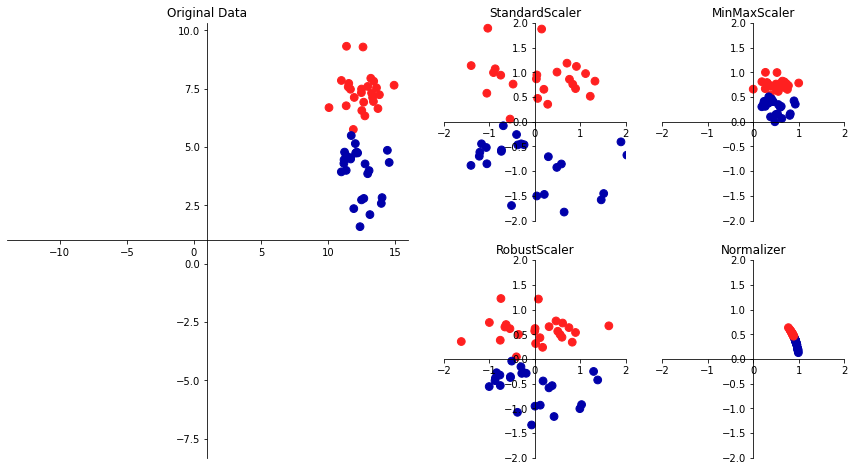

In [ ]:
mglearn.plots.plot_scaling()

* Standard Scaler
    * 평균 0, 분산 1
    * 모든 특성이 같은 크기를 가지게 한다.
    * 최솟값, 최댓값 크기를 제한하지 않음
* Robust Scaler
    * 특성들이 같은 스케일을 가짐
    * 중간 값과 사분위 값을 사용
* MinMax Scaler
    * 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경
* Normalizer
    * 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트 조정
    * 각 데이터 포인트가 다른 비율로 (길이에 반비례하여) 스케일이 조정
    * 특성 벡터의 길이는 상관없고 데이터의 방향(각도) 만이 중요할 때 많이 사용

#### 3.3.2 데이터 변환 적용하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.transform(X_train)
print('변환된 후 크기: ', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:\n', X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))

print('스케일 조정 후 특성별 최소값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_train_scaled.max(axis=0))

변환된 후 크기:  (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [ ]:
X_test_scaled = scaler.transform(X_test)

print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최소값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


#### 3.3.3 Qunatile Transformer와 PowerTransformer

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

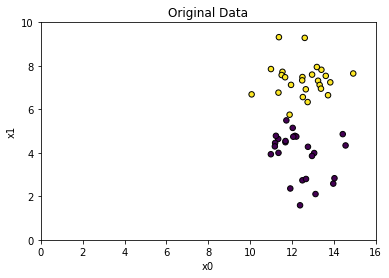

In [ ]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


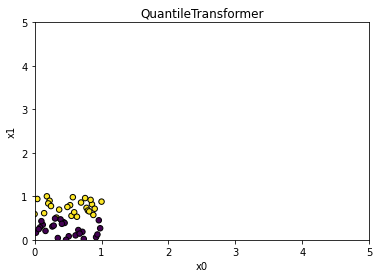

In [ ]:
# QuantileTransformer
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

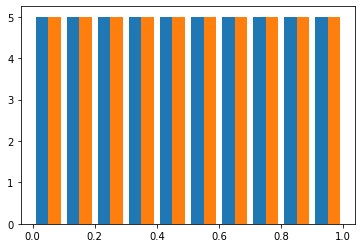

In [ ]:
plt.hist(X_trans)
plt.show()

In [ ]:
print(scaler.quantiles_.shape)

(50, 2)


In [ ]:
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [ ]:
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


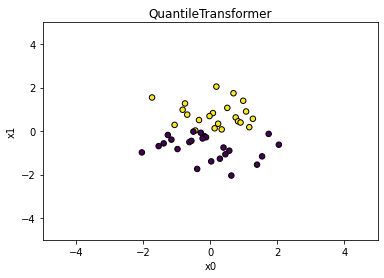

In [ ]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

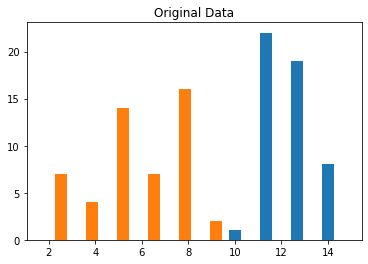

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


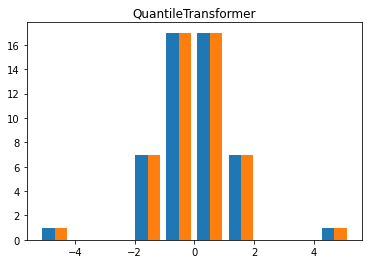

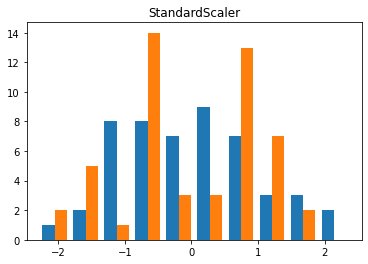

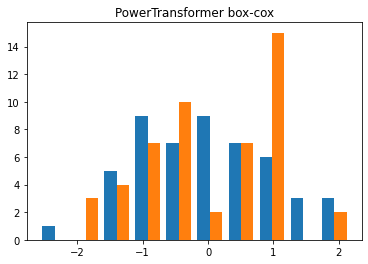

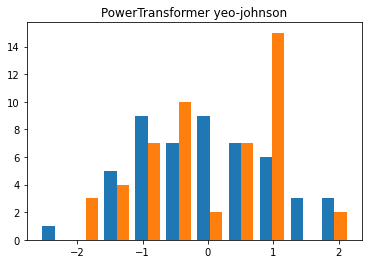

In [ ]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

#### 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

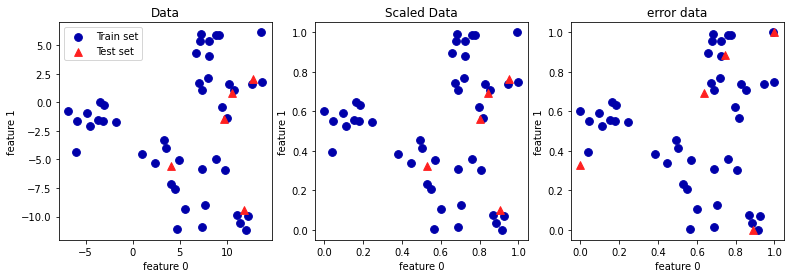

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# train, test scatter plot
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='Train set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1], label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Data')

# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='Train set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='Test set', s=60)
axes[1].set_title('Scaled Data')

# 테스트 셋의 스케일을 따로 조정
# 테스트 셋의 최솟값은 0, 최댓값은 1
# 예제를 위한 것이므로, 절대 이렇게 사용해서는 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].set_title('error data')

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

#### 3.3.5 지도 학습에서 데이터 전처리 효과

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Accuracy of Test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of Test set: 0.94


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정도니 데이터로 svm 학습
svm.fit(X_train_scaled, y_train)

print('Accuracy of Scaled Test set: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Accuracy of Scaled Test set: 0.97


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print('SVM test accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


### 3.4 차원 축소, 특성 추출, 매니폴드 학습


#### 3.4.1 PCA(주성분 분석)

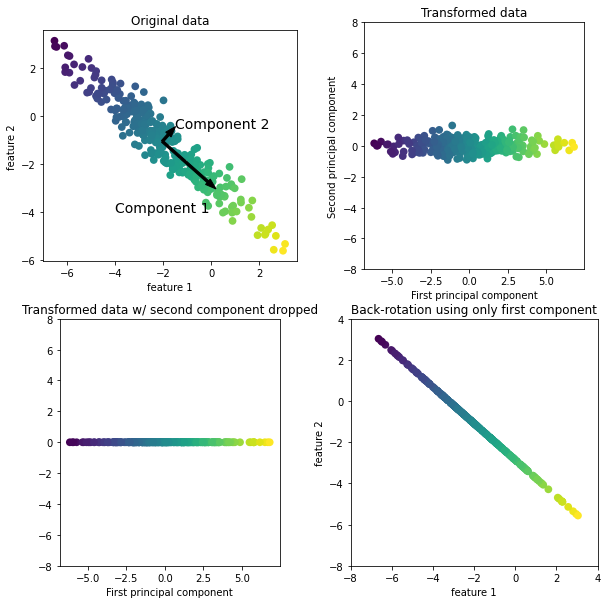

In [ ]:
mglearn.plots.plot_pca_illustration()

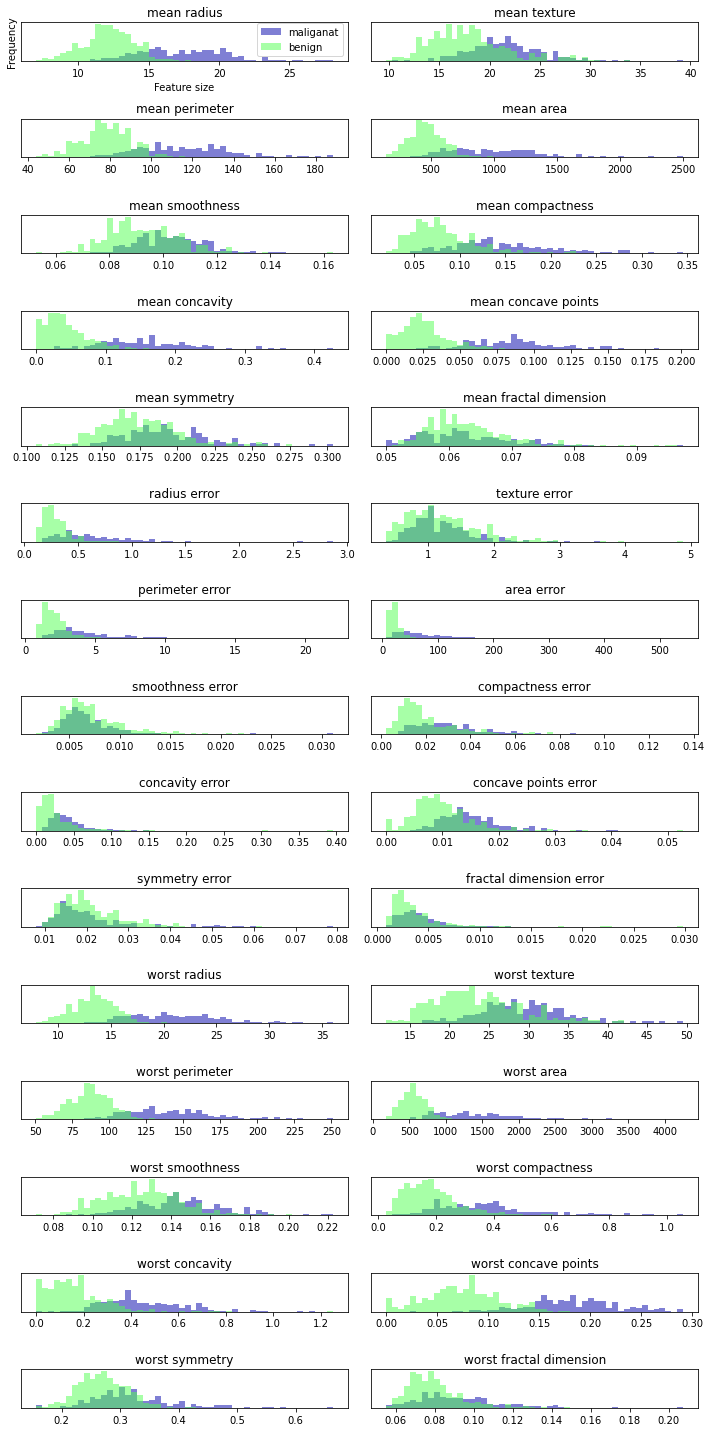

In [ ]:
# PCA를 적용해 유방암 데이터셋 시각화
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('Feature size')
ax[0].set_ylabel('Frequency')
ax[0].legend(["maliganat", "benign"], loc='best')
fig.tight_layout()

In [ ]:
# PCA 적용 전 StandardScaler를 사용해 데이터 스케일 조정
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [ ]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print('data shape: ', str(X_scaled.shape))
print('pca data shape: ', str(X_pca.shape))

data shape:  (569, 30)
pca data shape:  (569, 2)


Text(0, 0.5, 'Second principal component')

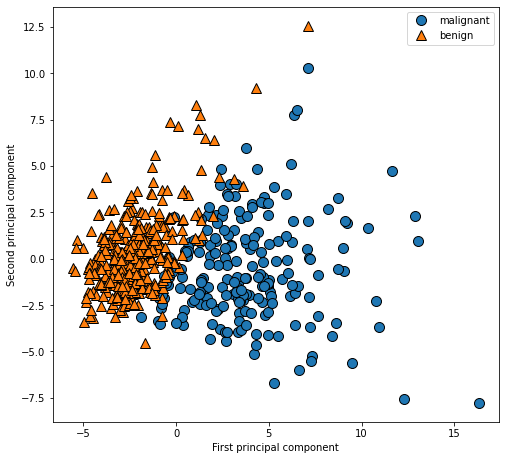

In [ ]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [ ]:
print('PCA principal component shape: ', pca.components_.shape)

PCA principal component shape:  (2, 30)


In [ ]:
print('PCA principal component:\n', pca.components_)

PCA principal component:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal component')

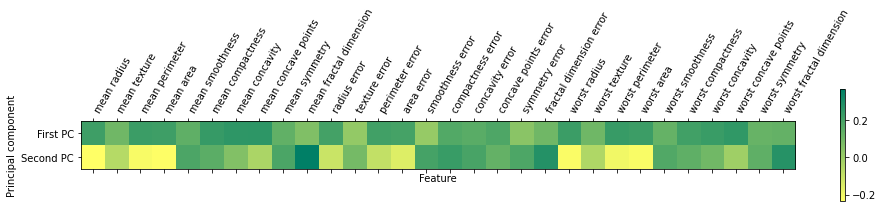

In [ ]:
# 히트맵으로 시각화
plt.matshow(pca.components_, cmap='summer_r')
plt.yticks([0, 1], ['First PC', 'Second PC'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal component')

* 고유얼굴(eigenface) 특성 추출

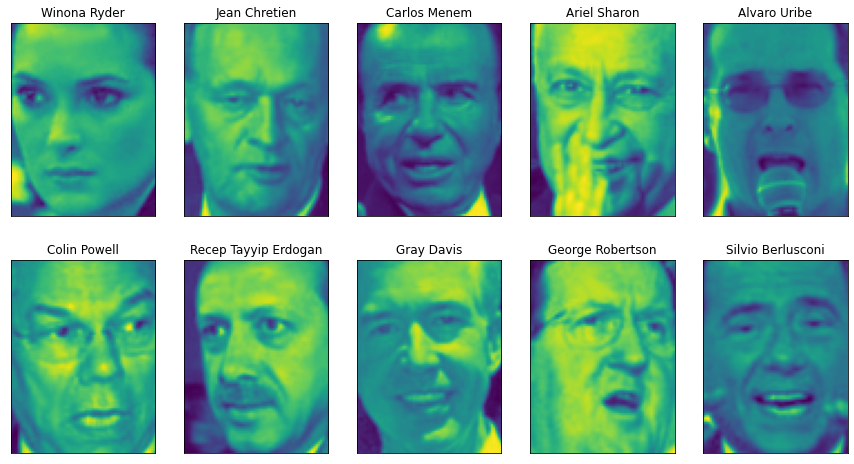

In [ ]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [ ]:
print('people.image.shape: ', people.images.shape)
print('number of class: ', len(people.target_names))

people.image.shape:  (3023, 87, 65)
number of class:  62


In [ ]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [ ]:
# 조지 부시에 치우쳐저 있어 사람마다 50개 이미지만 추출
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 셋 점수: {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 셋 점수: 0.23


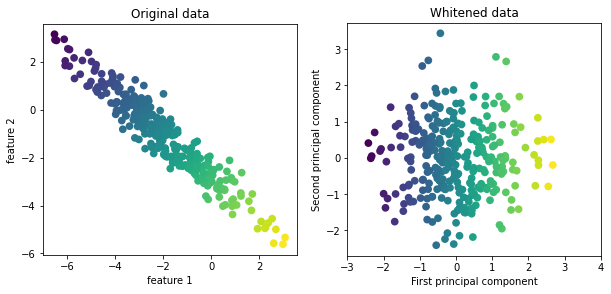

In [ ]:
mglearn.plots.plot_pca_whitening()

In [ ]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: ", X_train_pca.shape)

X_train_pca.shape:  (1547, 100)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('Test Accuracy: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test Accuracy: 0.31


In [ ]:
print('pca.components_.shape: ', pca.components_.shape)

pca.components_.shape:  (100, 5655)


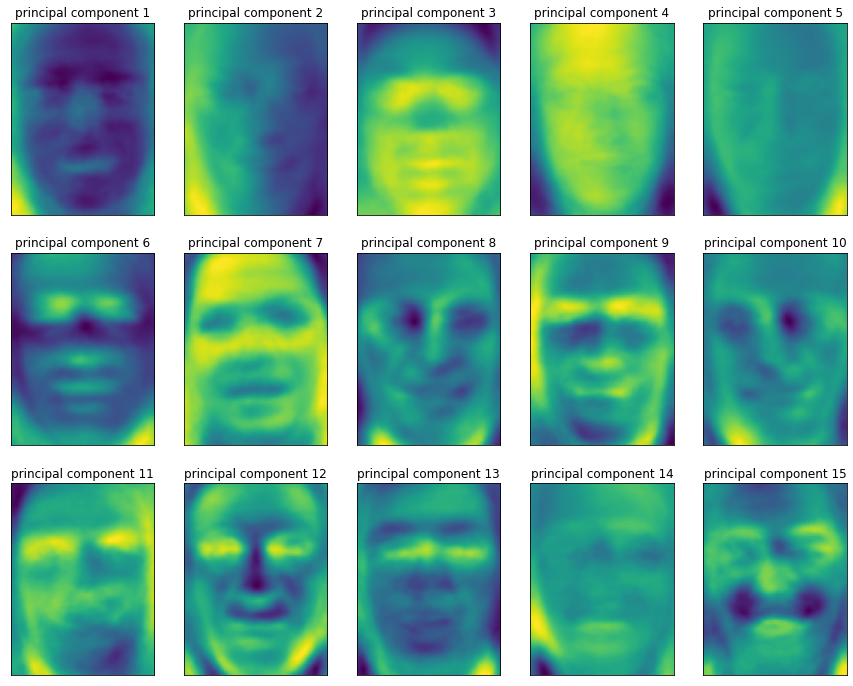

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('principal component {}'.format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 4.6s, 0.1min


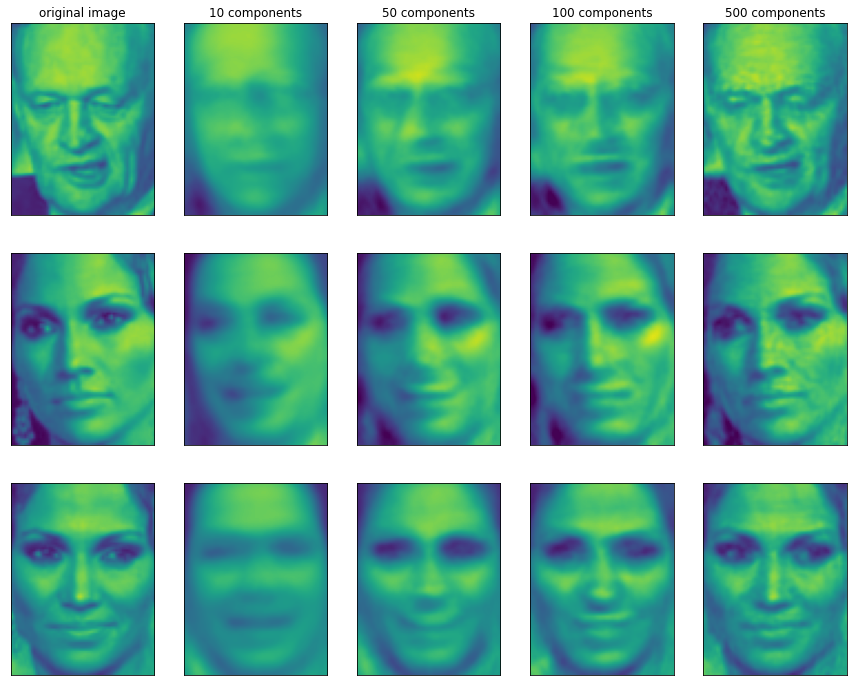

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second PC')

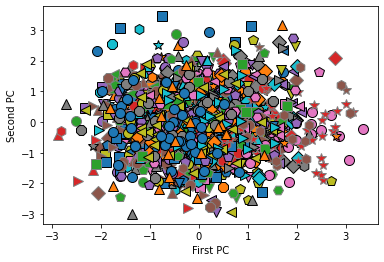

In [ ]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First PC')
plt.ylabel('Second PC')

#### 3.4.2 Non-negative Matrix Factorization (NMF. 비음수 행렬 분해)

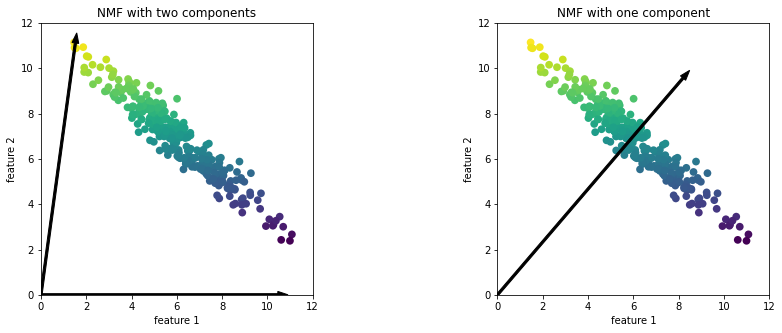

In [ ]:
# 인위적 데이터에 NMF 적용하기
mglearn.plots.plot_nmf_illustration()

Text(0, 0.5, 'Signal')

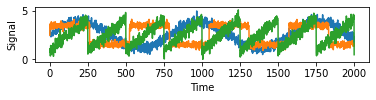

In [ ]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [ ]:
# 원본 데이터를 사용해 100개의 측정 데이터 생성
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('원본 데이터 형태: ', X.shape)

원본 데이터 형태:  (2000, 100)


In [ ]:
# NMF를 사용해 세 개의 신호 복원
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태: ', S_.shape)

복원한 신호 데이터 형태:  (2000, 3)


In [ ]:
# 비교를 위해 pca 적용
pca = PCA(n_components=3)
H = pca.fit_transform(X)

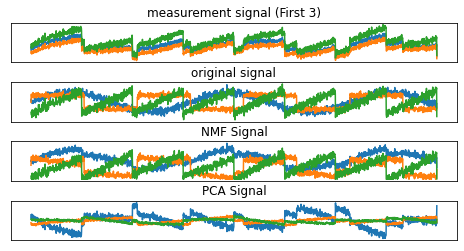

In [ ]:
models = [X, S, S_, H]
names = ['measurement signal (First 3)', 'original signal', 'NMF Signal', 'PCA Signal']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
plt.show()

#### 3.4.3 t-SNE (t-Distributed Stochastic Neighbor Embedding)를 이용한 매니폴드 학습

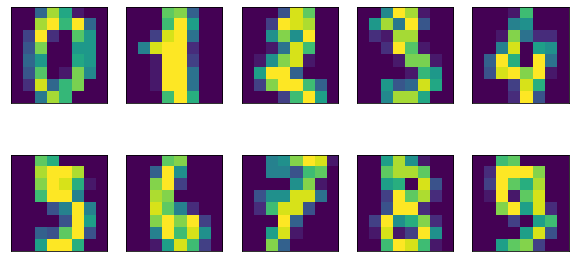

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second Component')

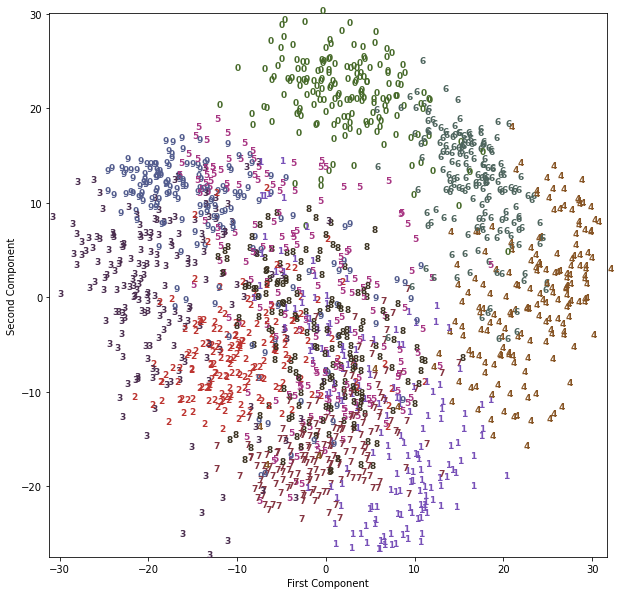

In [ ]:
pca = PCA(n_components=2)
pca.fit(digits.data)

# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

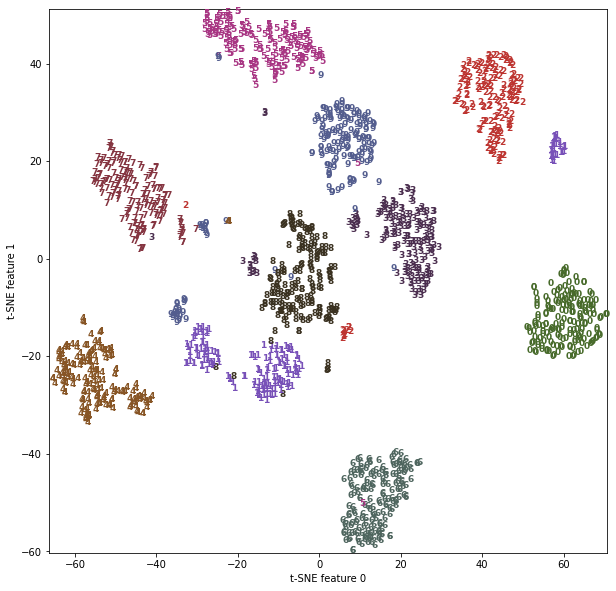

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], 
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

### 3.5 Clustering (군집)

#### 3.5.1 k-means Clustering

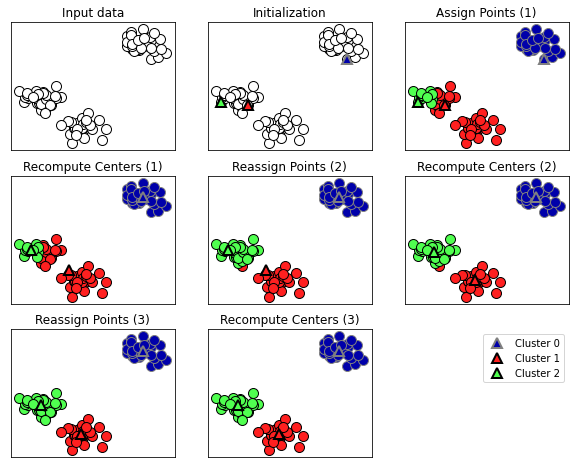

In [ ]:
mglearn.plots.plot_kmeans_algorithm()

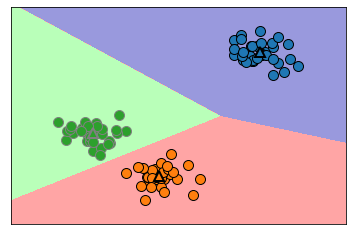

In [ ]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print('Cluster label:\n{}'.format(kmeans.labels_))

Cluster label:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [ ]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


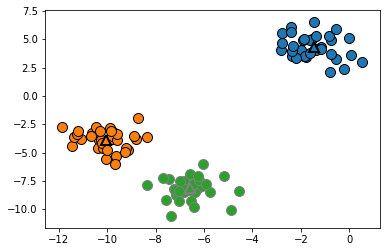

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

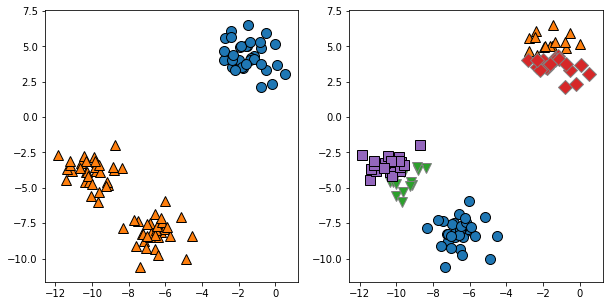

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

* k-means 알고리즘이 실패하는 경우

Text(0, 0.5, 'feature 1')

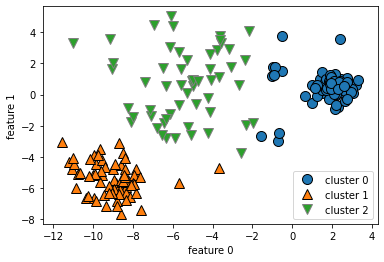

In [ ]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

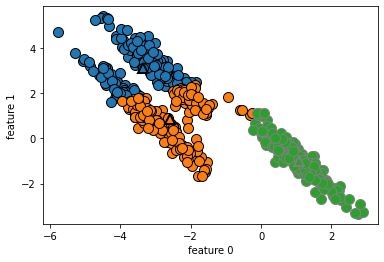

In [ ]:
# k-means clustering은 모든 방향이 똑같이 중요하다고 생각한다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타낸다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

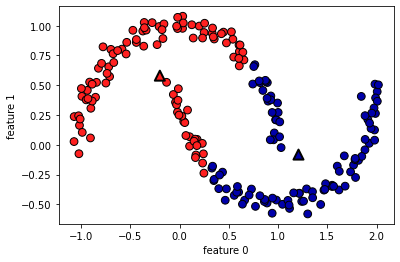

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2, edgecolors='k')
plt.xlabel('feature 0')
plt.ylabel('feature 1')

* 벡터 양자화 또는 분해 메서드로서의 k-평균

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=42)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

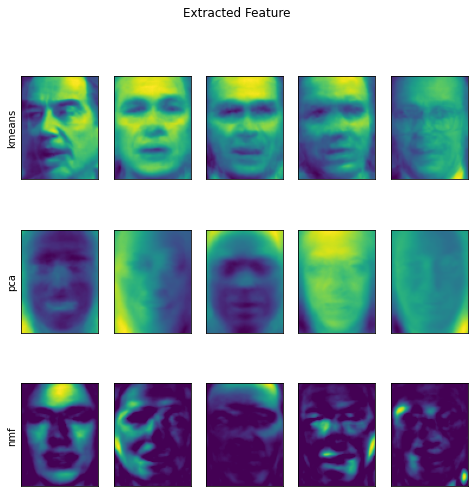

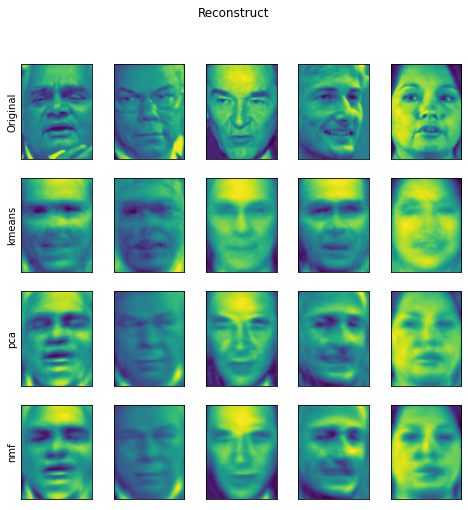

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Extracted Feature')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Reconstruct')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('Original')
axes[1, 0].set_ylabel('kmeans')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

Cluster label:
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


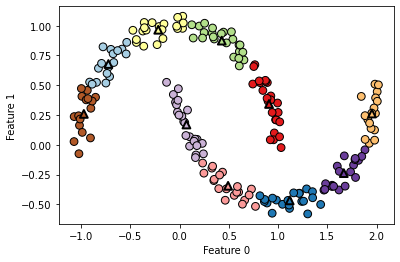

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='black')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
print('Cluster label:\n', y_pred)

In [ ]:
distance_features = kmeans.transform(X)
print('Cluster Distance data shape: ', distance_features.shape)
print('Cluster Distance:\n', distance_features)

Cluster Distance data shape:  (200, 10)
Cluster Distance:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


#### 3.5.2 Agglomerative Clustering (병합 군집)

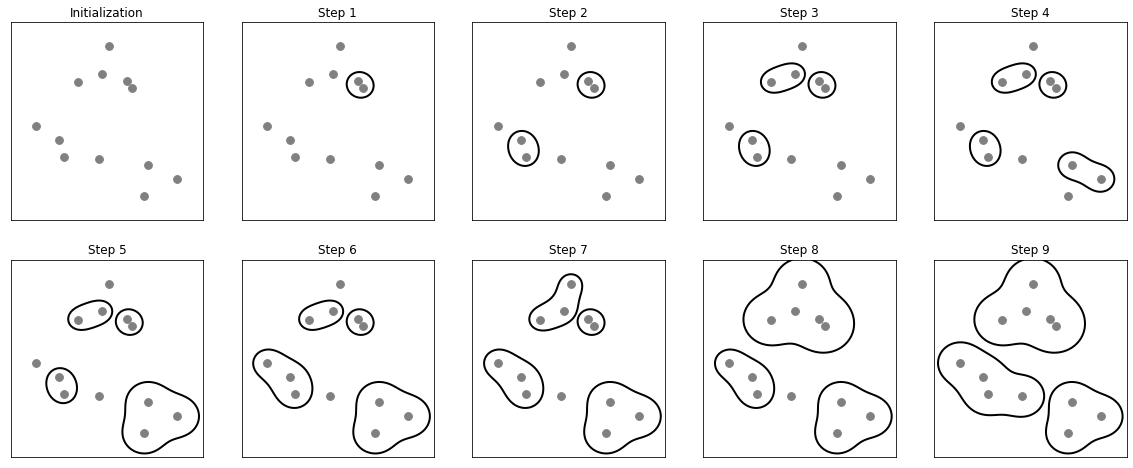

In [ ]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

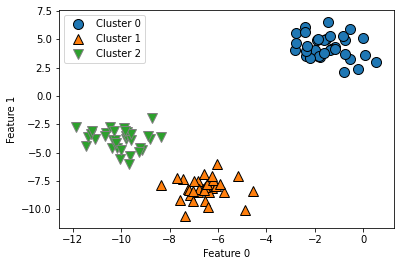

In [ ]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

* Hierarchical Clustering & Dendrogram (계층적 군집과 덴드로그램)

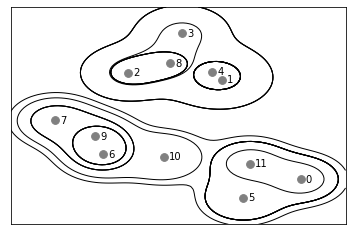

In [ ]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'cluster distance')

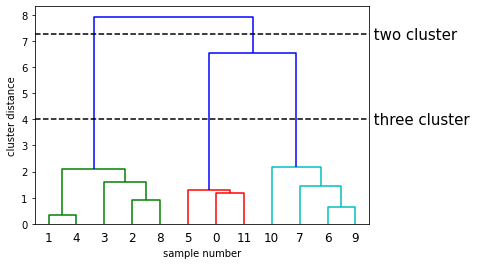

In [ ]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용
# ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two cluster', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three cluster', va='center', fontdict={'size': 15})
plt.xlabel('sample number')
plt.ylabel('cluster distance')

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [ ]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster label:\n', clusters)

Cluster label:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


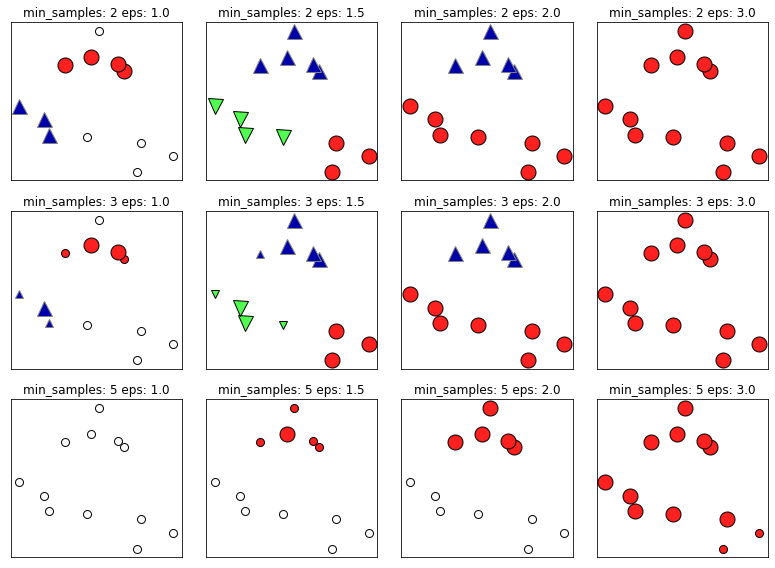

In [ ]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

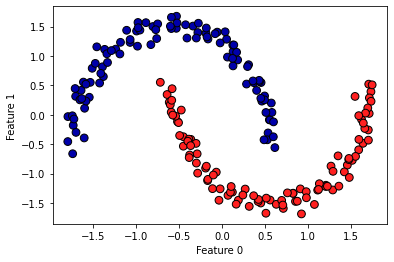

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 3.5.4 군집 알고리즘의 비교와 평가

* 타깃 값으로 군집 평가하기
    * ARI (Adjusted Rand Index)
    * NMI (Normalized Mutual Information)

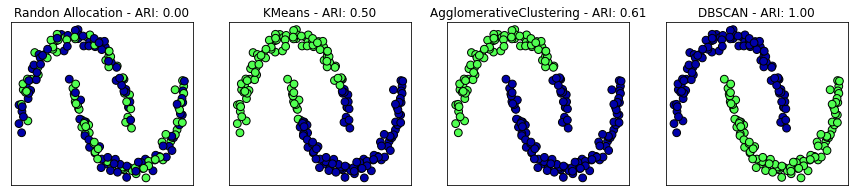

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()] #  사용할 알고리즘 모델 리스트

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위로 할당한 클러스터 그리기
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('Randon Allocation - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [ ]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print('Accuracy: {:.2f}'.format(accuracy_score(clusters1, clusters2)))
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


* 타깃값 없이 군집 평가하기

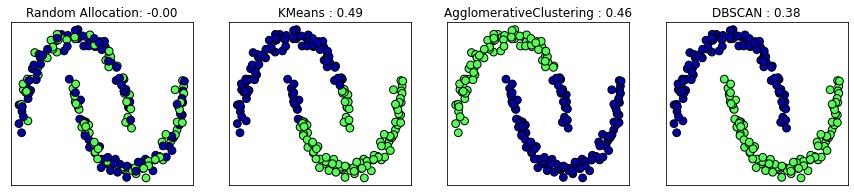

In [ ]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title('Random Allocation: {:.2f}'.format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당 및 클러스터 중심 그리기
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

* 얼굴 데이터셋으로 군집 알고리즘 비교

In [ ]:
# LFW 데이터에서 고유 얼굴을 찾은 다음 데이터를 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [ ]:
# DBSCAN으로 얼굴 데이터셋 분석하기
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Eigen label: ", np.unique(labels))

Eigen label:  [-1]


In [ ]:
# min_samples 변화
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('Eigen label: ', np.unique(labels))

Eigen label:  [-1]


In [ ]:
# eps 변화
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('Eigen label: ', np.unique(labels))

Eigen label:  [-1  0]


In [ ]:
# 잡음 포인트와 클러스터에 속한 포인트 수 세기
# bincount는 음수를 받을 수 없어 +1
# return 값의 첫 번째 원소는 잡음 포인트의 수
print("클러스터 별 포인트 수: ", np.bincount(labels + 1))

클러스터 별 포인트 수:  [  32 2031]


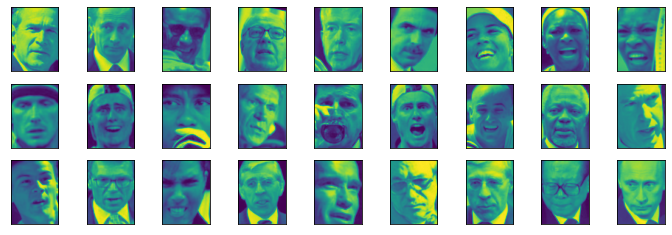

In [ ]:
# 잡음 포인트 확인
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print('\neps = ', eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('클러스터 수: ', len(np.unique(labels)))
    print("클러스터 크기: ", np.bincount(labels + 1))


eps =  1
클러스터 수:  1
클러스터 크기:  [2063]

eps =  3
클러스터 수:  1
클러스터 크기:  [2063]

eps =  5
클러스터 수:  1
클러스터 크기:  [2063]

eps =  7
클러스터 수:  14
클러스터 크기:  [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps =  9
클러스터 수:  4
클러스터 크기:  [1307  750    3    3]

eps =  11
클러스터 수:  2
클러스터 크기:  [ 413 1650]

eps =  13
클러스터 수:  2
클러스터 크기:  [ 120 1943]


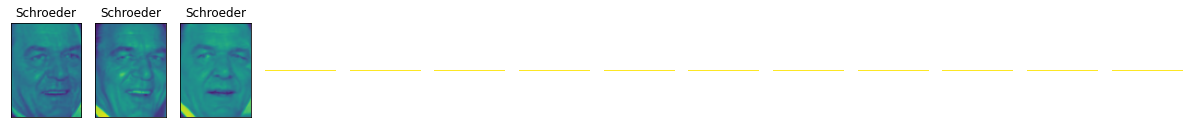

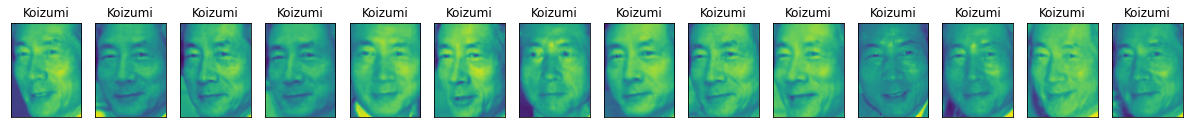

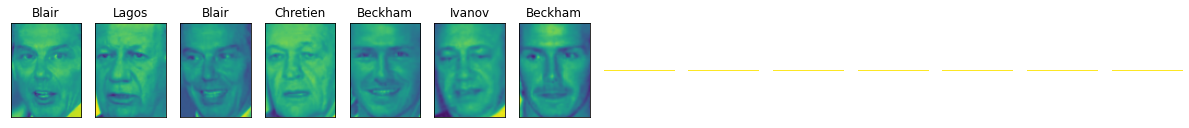

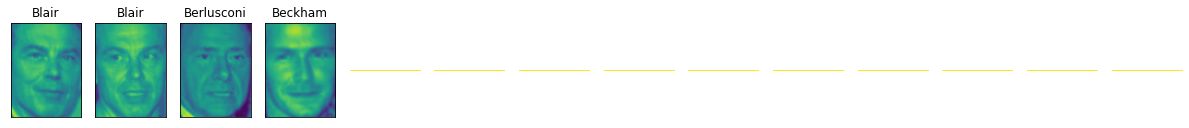

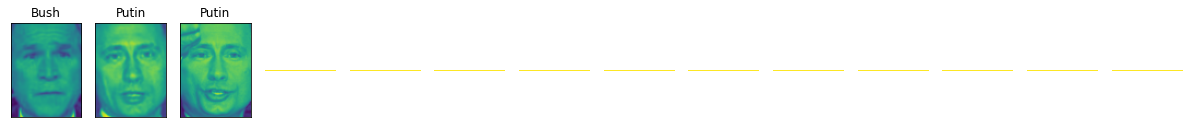

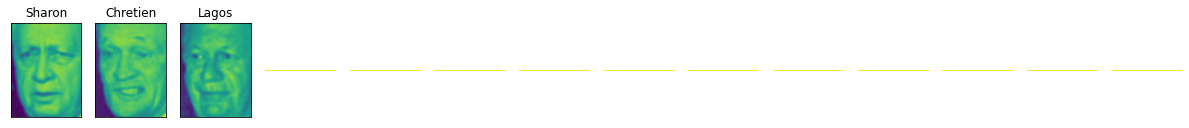

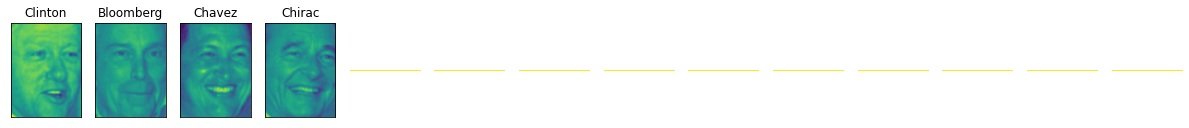

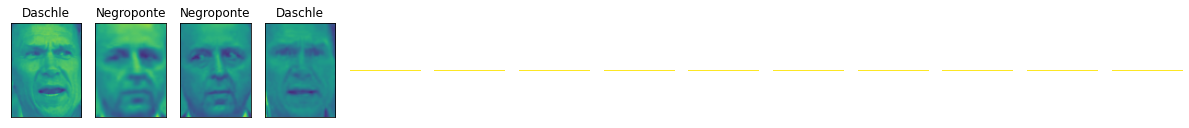

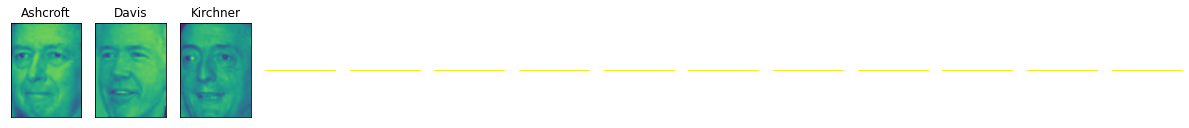

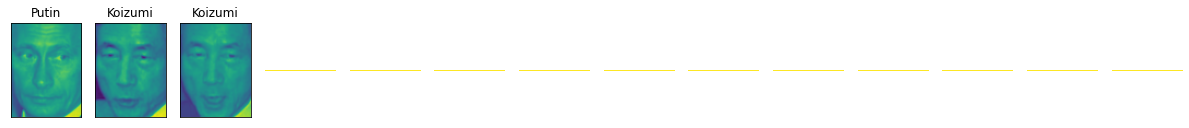

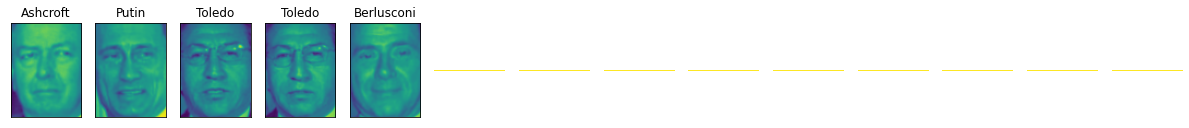

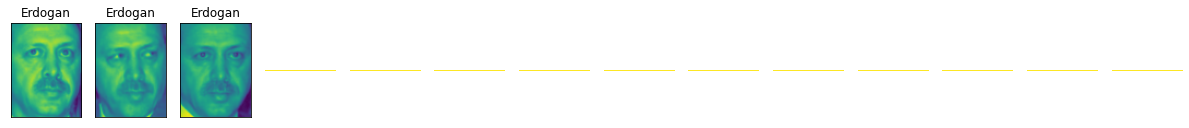

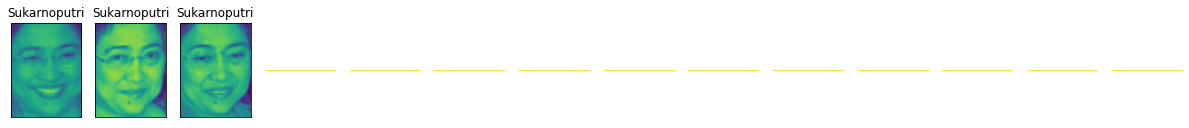

In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]), vmin=0, vmax=1)
        axes[j+i].axis('off')

* k-means로 얼굴 데이터셋 분석하기

In [ ]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('k-mean cluster size: ', np.bincount(labels_km))

k-mean cluster size:  [282 226 105 268 151 324 202 208 208  89]


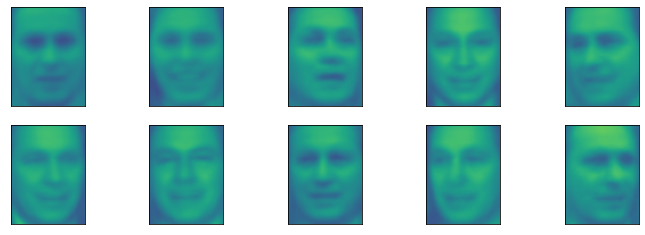

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(12, 4), subplot_kw={'xticks': (), 'yticks': ()})
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

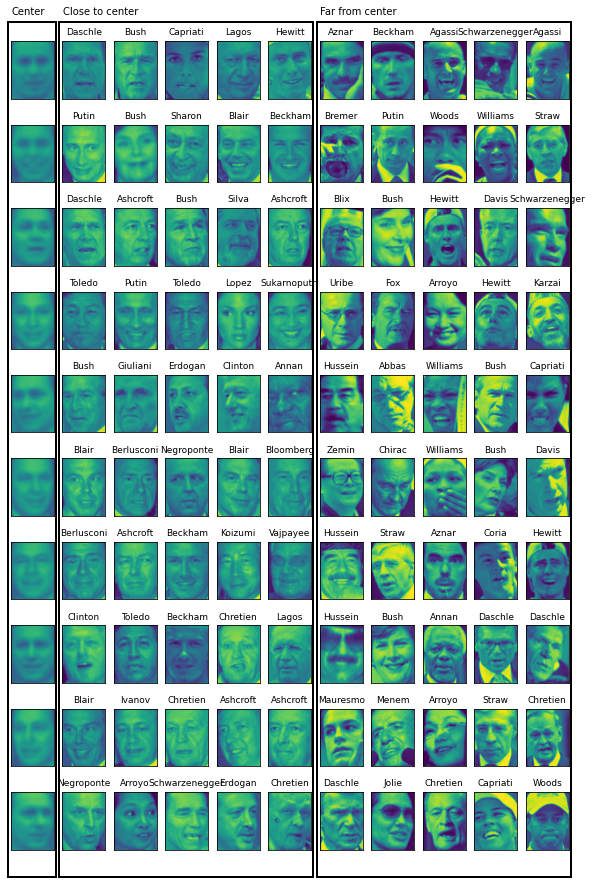

In [ ]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

* 병합 군집으로 얼굴 데이터셋 분석하기

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 군집의 클러스터 크기: ', np.bincount(labels_agg))

병합 군집의 클러스터 크기:  [169 660 144 329 217  85  18 261  31 149]


In [ ]:
print('ARI: {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10


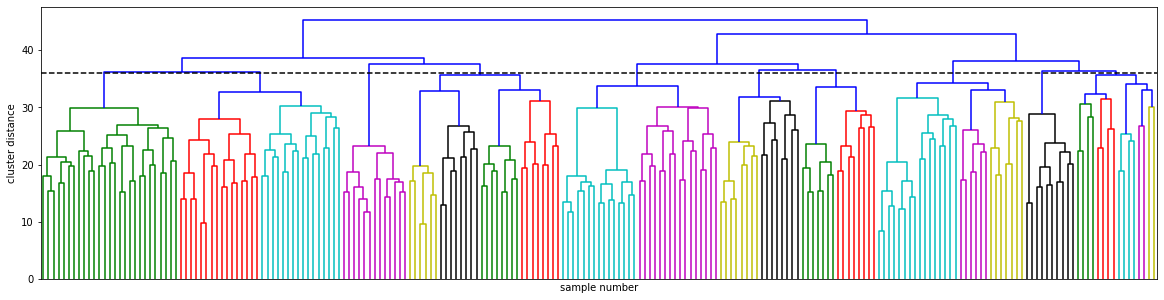

In [ ]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('sample number')
plt.ylabel('cluster distance')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

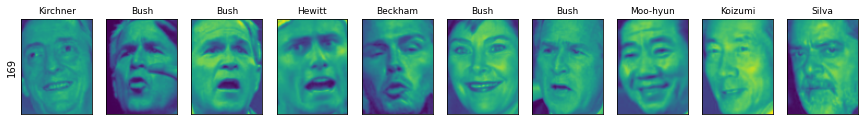

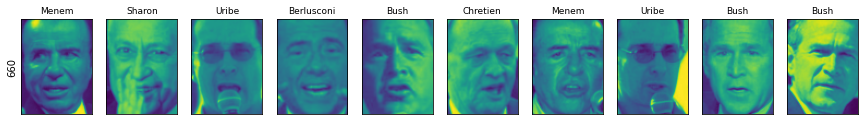

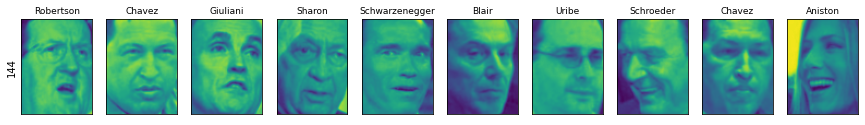

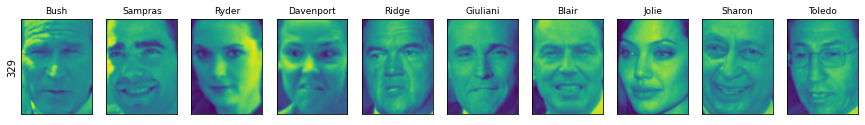

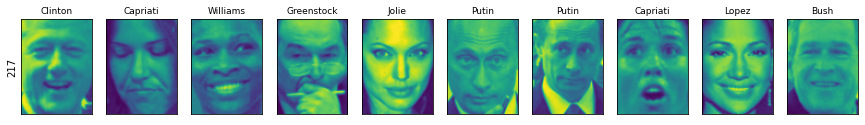

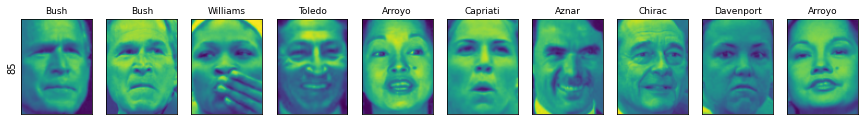

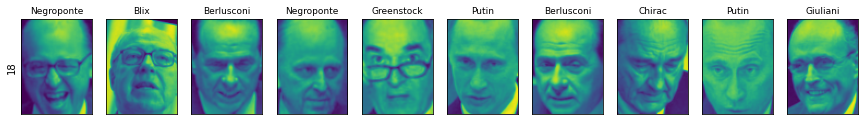

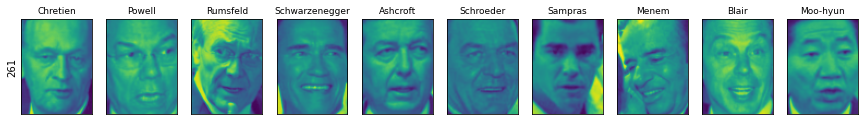

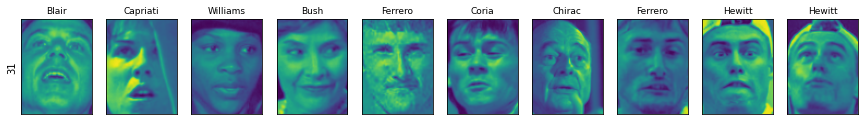

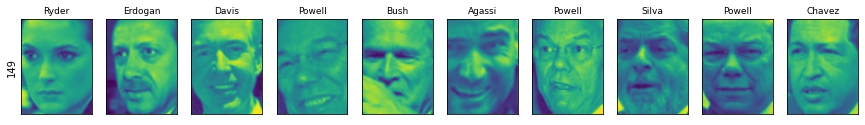

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

병합 군집의 클러스터 크기:
 [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


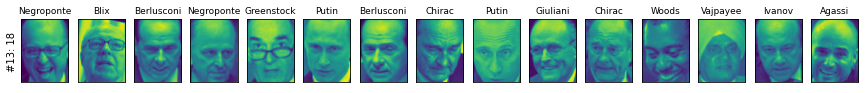

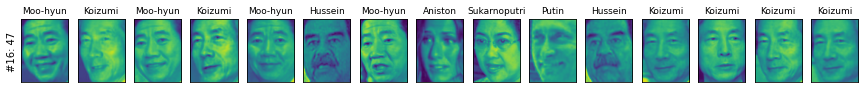

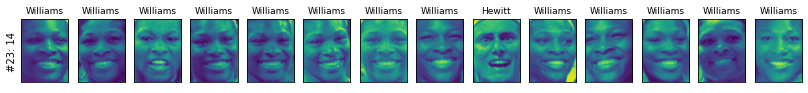

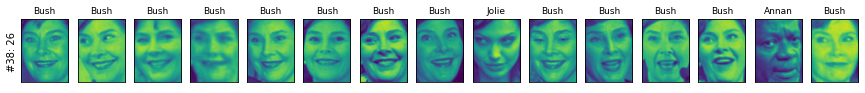

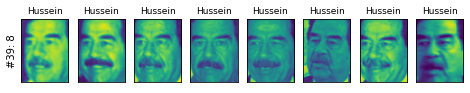

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('병합 군집의 클러스터 크기:\n', np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

#### 3.5.5 Clustering 요약

* k-means
    * 클러스터 중심을 사용해 클러스터를 구분
    * 각 데이터 포인트를 클러스터의 중심으로 대표할 수 있기 때문에 분해 방법으로 볼 수도 있다.

* DBSCAN
    * 클러스터에 할당되지 않는 잡음 포인트를 인식할 수 있으며 클러스터의 개수를 자동으로 결정
    * 복잡한 클러스터 모양 인식 가능
    * min_samples, eps

* Agglomerative clustering
    * 전체 데이터의 분할 계층도를 만들어주며 덴드로그램을 사용해 손쉽게 확인 가능